# Practica 5

In [30]:
from deap import creator, tools, base, algorithms
import numpy as np
import random


class Tren:
    def __init__(self, numero_vagones, operacion, matricula):
        self.numero_vagones = numero_vagones
        self.operacion = operacion
        self.matricula = matricula

    def __str__(self):
        return "Número de vagones: " + str(self.numero_vagones) + "\n" + \
        "Muelle de operaciones: " + str(self.operacion) + "\n" + \
                "Matrícula: " + str(self.matricula) + "\n"

    


def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_trenes = []
    for i in range(n):
        numero_vagones = random.randint(min_vagones, max_vagones)
        operacion = random.choice(["gas", "carbón", "contenedores"])
        lista_trenes.append(Tren(numero_vagones, operacion, i))
    return lista_trenes


def crear_cola_de_trenes(lista_de_trenes):
    auxiliar = lista_de_trenes
    random.shuffle(auxiliar)
    return auxiliar


class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes):
        list.extend(self,crear_cola_de_trenes(lista_de_trenes))

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena
    

random.seed(2024)
lista_de_trenes = producir_lista_trenes_aleatoria(50, 10, 30)


cola_de_trenes = Cola_de_trenes(lista_de_trenes)

In [14]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", Cola_de_trenes, fitness=creator.FitnessMin)

C:\Users\Usuario\PycharmProjects\vent\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Usuario\PycharmProjects\vent\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [41]:
toolbox = base.Toolbox()

# Crear individuos
toolbox.register("individual", creator.Individual, producir_lista_trenes_aleatoria(50, 10, 30))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [42]:

def tiempo_total(indiv):
    sum = 0 
    for tren in indiv:
        sum += tren.numero_vagones

    return sum



def evaluar_cola(individuo):
    
    muelle_gas = 1
    muelle_carbon = 1
    muelle_contenedores = 1
    id_tren = 0

    
    for i in range(tiempo_total(individuo)):
        muelle_gas -= 1
        muelle_carbon -= 1
        muelle_contenedores -= 1
        
        if id_tren >= len(individuo) and muelle_carbon <= 0 and muelle_contenedores <= 0 and muelle_gas <= 0:
            break
        
        for _ in range(3):
            
            if id_tren >= len(individuo):
                break

            if individuo[id_tren].operacion == "carbón" and muelle_carbon <= 0:
                muelle_carbon = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
            if individuo[id_tren].operacion == "contenedores" and muelle_contenedores <= 0:
                muelle_contenedores = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
                
            if individuo[id_tren].operacion == "gas" and muelle_gas <= 0:
                muelle_gas = individuo[id_tren].numero_vagones
                id_tren += 1
                continue

        continue
    return i,


In [43]:
# Funcion mutacion

def train_swap(indivuduo, indpb):
    if random.random() < indpb:
        pos1 = random.randint(0, len(indivuduo) - 1)
        pos2 = random.randint(0, len(indivuduo) - 1)
        
        train1 = indivuduo[pos1]
        train2 = indivuduo[pos2]
        indivuduo[pos1] = train2
        indivuduo[pos2] = train1
        
        print(pos1, pos2)
        
    return indivuduo,
        
        
        

In [44]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", train_swap, indpb=0.03)

In [45]:
ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

In [46]:
poblacion = toolbox.population(n=100)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.5, mutpb=0.2, ngen=35, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	100   	564.89  	650	466
10 39
1  	55    	536.08  	602	458
2  	59    	514.98  	576	458
24 27
3  	56    	497.15  	543	444
14 46
4  	63    	480.08  	533	440
5  	54    	465.27  	515	426
6  	69    	452.43  	521	399
7  	61    	442.44  	499	405
8  	64    	429.76  	470	390
27 16
9  	60    	418.76  	448	390
28 23
10 	57    	411.94  	457	377
11 	51    	401.78  	441	371
12 	57    	392.88  	452	365
13 	60    	385.95  	419	365
8 31
43 5
14 	54    	379.42  	427	357
33 42
15 	52    	372.6   	406	349
16 	63    	367.62  	400	349
25 35
17 	66    	363.33  	392	349
18 	66    	358.65  	388	347
28 30
19 	60    	355.26  	396	339
40 14
20 	69    	351.05  	395	339
45 44
5 49
20 23
21 	68    	347.64  	370	337
22 	62    	344.51  	358	331
36 6
36 34
23 	63    	341.1   	382	331
24 	64    	337.54  	356	327
31 45
25 	58    	334.29  	358	327
26 	49    	331.47  	351	327
38 38
27 	51    	329.4   	335	327
28 	51    	328.06  	337	327
29 	69    	327.15  	329	327
30 	62    	327     	327	327


In [49]:
print(f'El mejor individuo es \n {ranking[0]} con aptitud {ranking[0].fitness}')

El mejor individuo es 
 Número de vagones: 11
Muelle de operaciones: gas
Matrícula: 11

Número de vagones: 10
Muelle de operaciones: carbón
Matrícula: 23

Número de vagones: 13
Muelle de operaciones: contenedores
Matrícula: 42

Número de vagones: 10
Muelle de operaciones: gas
Matrícula: 7

Número de vagones: 19
Muelle de operaciones: carbón
Matrícula: 24

Número de vagones: 20
Muelle de operaciones: contenedores
Matrícula: 17

Número de vagones: 22
Muelle de operaciones: gas
Matrícula: 4

Número de vagones: 27
Muelle de operaciones: contenedores
Matrícula: 38

Número de vagones: 29
Muelle de operaciones: carbón
Matrícula: 28

Número de vagones: 10
Muelle de operaciones: gas
Matrícula: 9

Número de vagones: 14
Muelle de operaciones: gas
Matrícula: 22

Número de vagones: 27
Muelle de operaciones: contenedores
Matrícula: 38

Número de vagones: 26
Muelle de operaciones: gas
Matrícula: 46

Número de vagones: 23
Muelle de operaciones: carbón
Matrícula: 27

Número de vagones: 19
Muelle de ope

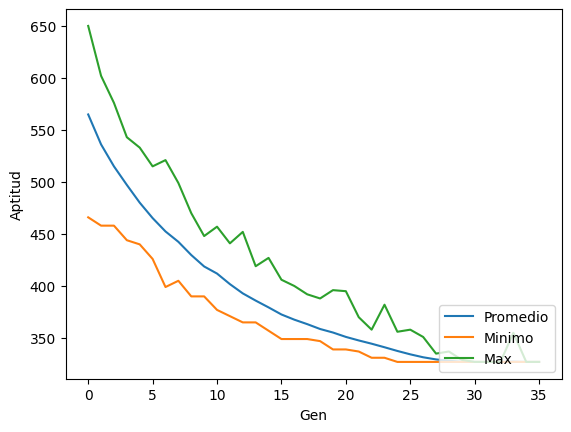

In [52]:
import matplotlib.pyplot as plt


gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="lower right")
plt.show()